In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv(r"c:\Users\Sushree S Swain\Desktop\seattle-weather.csv")

In [ ]:
def knn(train_data, test_data, k):
    predictions = []
    for test_point in test_data:
        distances = []
        for train_point in train_data:
            distance = np.linalg.norm(test_point[:-1] - train_point[:-1])  # Euclidean distance
            distances.append((train_point, distance))
        distances.sort(key=lambda x: x[1])
        neighbors = [point[0] for point in distances[:k]]
        labels = [neighbor[-1] for neighbor in neighbors]
        prediction = max(set(labels), key=labels.count)
        predictions.append(prediction)
    return predictions

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [15]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [4]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [10]:
X = df[['temp_min', 'wind', 'precipitation','temp_max']]
y = df['weather']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
k = 5  
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
y_pred = knn.predict(X_test)

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.78


In [16]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[  1   0   0   0   8]
 [  1   5   3   0  16]
 [  0   1 106   0  13]
 [  0   1   4   0   3]
 [  1   6   7   0 117]]


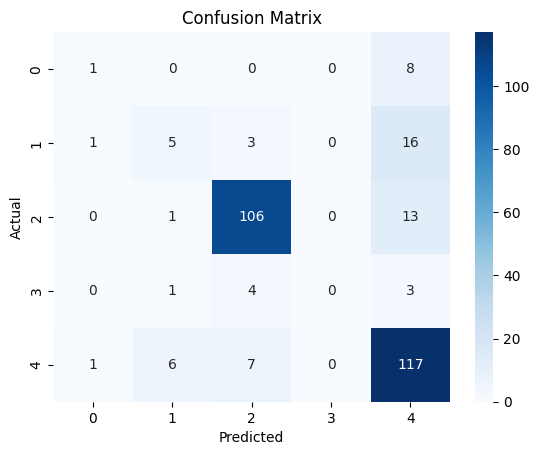

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")

plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.title('Confusion Matrix')
plt.show()

c:\Users\Sushree S Swain\Downloads\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
c:\Users\Sushree S Swain\Downloads\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
c:\Users\Sushree S Swain\Downloads\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
c:\Users\Sushree S Swain\Downloads\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
c:\Users\Sushree S Swain\Downloads\lib\site-packages\seaborn\axisgri

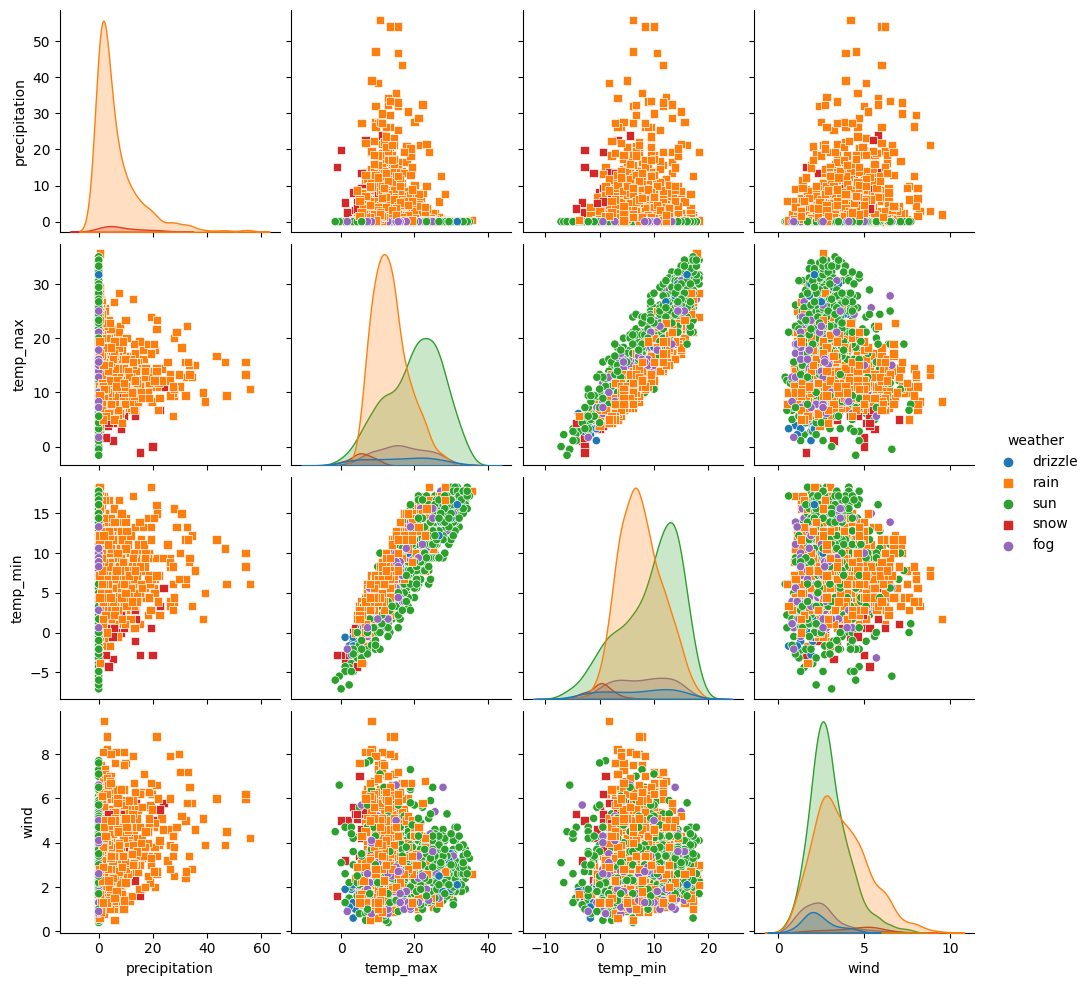

In [19]:
sns.pairplot(df, hue="weather", markers=["o", "s"])
plt.show()